In [69]:


import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

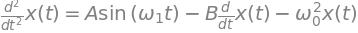

In [70]:

x = sp.Function('x',real=True)
t=sp.Symbol('t',real=True)
w0=sp.Symbol('omega_0',real=True,positive=True)
w1=sp.Symbol('omega_1',real=True,positive=True)
A=sp.Symbol('A',real=True)
B=sp.Symbol('B',real=True,positive=True)

x0=sp.Symbol('x_0',real=True)
v0=sp.Symbol('v_0',real=True)

eq = sp.Eq(x(t).diff(t, t), -w0**2 * x(t)+A*sp.sin(w1*t)-B*x(t).diff(t))
eq

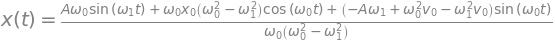

In [71]:
#z wymuszeniem
sol1=sp.dsolve(eq.subs({B:0}),ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol1.simplify()

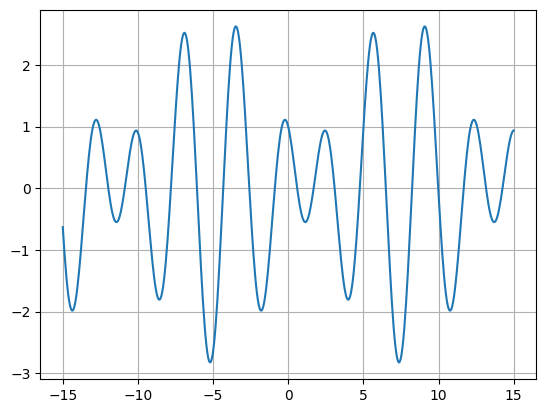

In [72]:
#wymuszenie z mniejsza czestotliwoscia
solf = sp.lambdify(t, sol1.rhs.subs({x0: 1, v0: -1, w0: 2,w1: 1.5,A: 2}))
ts = np.linspace(-15, 15, 500)
plt.plot(ts, solf(ts))
plt.grid()

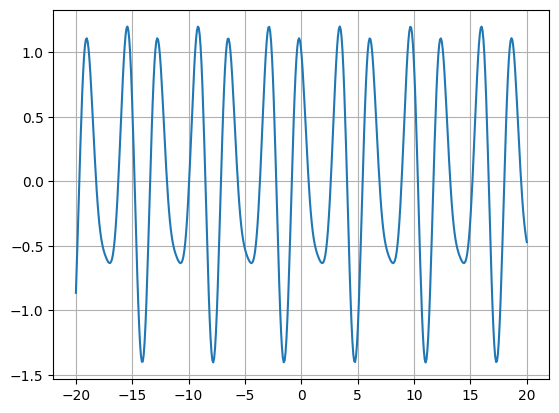

In [73]:
#wymuszenie z większą czestotliwością
solf = sp.lambdify(t, sol1.rhs.subs({x0: 1, v0: -1, w0: 2,w1: 3,A: 2}))
ts = np.linspace(-20, 20, 500)
plt.plot(ts, solf(ts))
plt.grid()

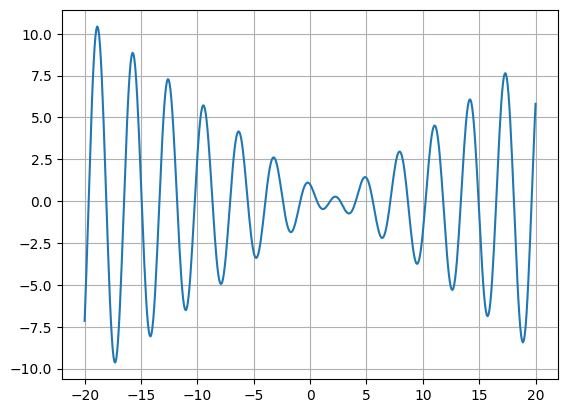

In [74]:
#dla takiej samej czestotliwosci trzeba rozwiązać jeszcze raz, bo sympy zaklada ze w1!=w0
sol1=sp.dsolve(eq.subs({B:0,w1:w0}),ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
solf = sp.lambdify(t, sol1.rhs.subs({x0: 1, v0: -1, w0: 2,A: 2}))
ts = np.linspace(-20, 20, 500)
plt.plot(ts, solf(ts))
plt.grid()

In [80]:
#z tłumieniem
sol2=sp.dsolve(eq.subs(A,0),ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol2=sol2.simplify()
sol2

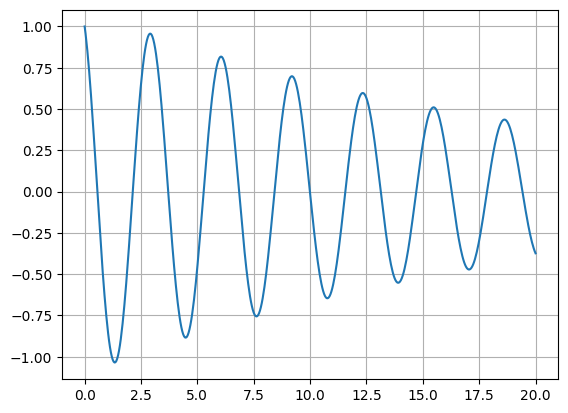

In [81]:
solf = sp.lambdify(t, sol2.rhs.subs({x0: 1, v0: -1, w0: 2,B: 0.1}))
ts = np.linspace(0, 20, 500)#nie ma sensu brac ujemnych tutaj
plt.plot(ts, solf(ts))
plt.grid()

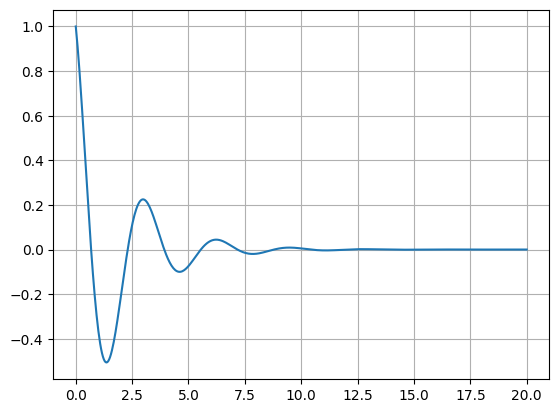

In [77]:
solf = sp.lambdify(t, sol2.rhs.subs({x0: 1, v0: -1, w0: 2,B: 1}))
ts = np.linspace(0, 20, 500)#nie ma sensu brac ujemnych tutaj
plt.plot(ts, solf(ts))
plt.grid()

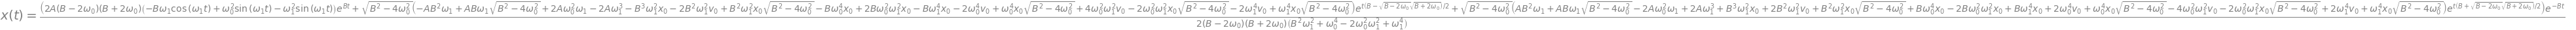

In [90]:
#a teraz wymuszenie i tlumienie
sol3=sp.dsolve(eq,ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol3=sol3.simplify()
sol3

c:\Users\pawel\PwZN_Szym\proj7\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


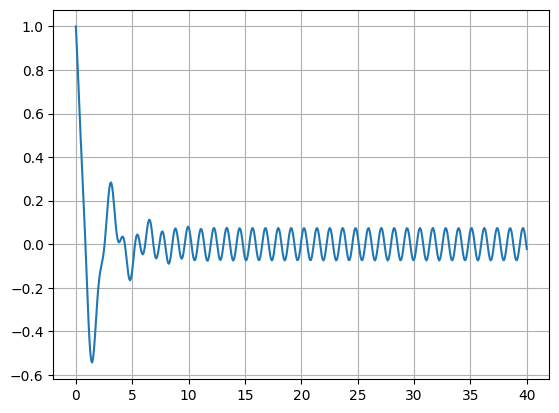

In [89]:
#duza czestotliwosc wymuszenia
solf = sp.lambdify(t, sol3.rhs.subs({x0: 1, v0: -1, w0: 2,w1: 5.5, A:2,B: 1}))
ts = np.linspace(0, 40, 500)
plt.plot(ts, solf(ts))
plt.grid()

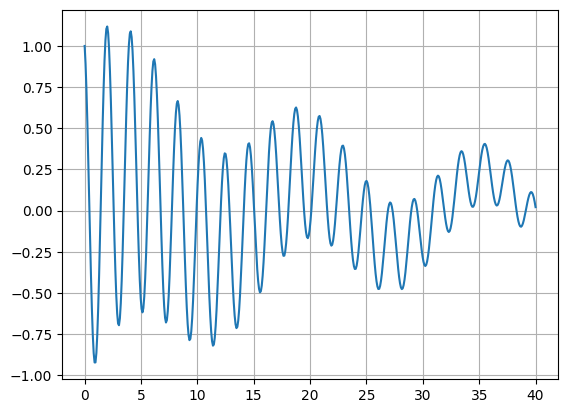

In [93]:
#duza czestotliwosc wymuszenia
solf = sp.lambdify(t, sol3.rhs.subs({x0: 1, v0: -1, w0: 3,w1: 0.4, A:2,B: 0.1}))
ts = np.linspace(0, 40, 500)
plt.plot(ts, solf(ts))
plt.grid()

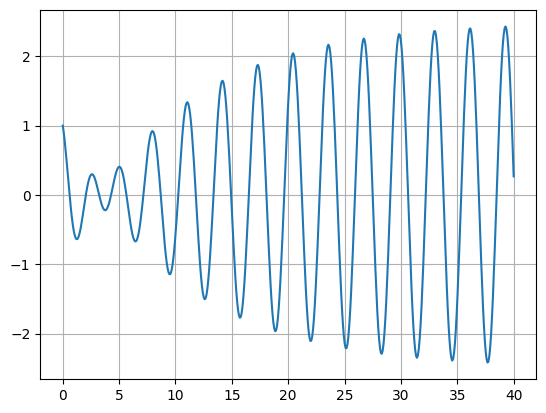

In [101]:
#wymuszenie jak czestotliwosc wlasna
sol3=sp.dsolve(eq.subs({w1:w0}),ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
solf = sp.lambdify(t, sol3.rhs.subs({x0: 1, v0: -1, w0: 2,A: 1,B: 0.2}))
ts = np.linspace(0, 40, 500)
plt.plot(ts, solf(ts))
plt.grid()